# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [7]:
print(weather_api_key)

5e236fbe298cc07102f49252a9c65094


### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aswan
Processing Record 2 of Set 1 | ambovombe
Processing Record 3 of Set 1 | andovoranto
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | severo-yeniseyskiy
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | ar rutbah
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | lubao
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | jianshui
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | malysheva
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | taroa
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | astara
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | west island
Processing Rec

Processing Record 40 of Set 4 | caxito
Processing Record 41 of Set 4 | dudinka
Processing Record 42 of Set 4 | ulanhot
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | santo antonio
Processing Record 45 of Set 4 | fale old settlement
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | ust-tsilma
Processing Record 48 of Set 4 | sao jose da coroa grande
Processing Record 49 of Set 4 | battagram
Processing Record 0 of Set 5 | ihosy
Processing Record 1 of Set 5 | uturoa
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | kenora
Processing Record 4 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 5 | rio preto da eva
Processing Record 6 of Set 5 | dakhla
Processing Record 7 of Set 5 | eydhafushi
Processing Record 8 of Set 5 | mogocha
Processing Record 9 of Set 5 | ar rahad
Processing Record 10 of Set 5 | polyarnyy
Processing Record 11 of Set 5 | mokhsogollokh
Processing Record 12 of Set 5 | mafinga
Proce

Processing Record 33 of Set 8 | caleta de carquin
Processing Record 34 of Set 8 | novosin'kovo
City not found. Skipping...
Processing Record 35 of Set 8 | kristiansund
Processing Record 36 of Set 8 | nagqu
Processing Record 37 of Set 8 | guaymate
Processing Record 38 of Set 8 | ust'-ordynskiy
Processing Record 39 of Set 8 | launceston
Processing Record 40 of Set 8 | st. john's
Processing Record 41 of Set 8 | fort bragg
Processing Record 42 of Set 8 | al bawiti
Processing Record 43 of Set 8 | constantia
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | jarny
Processing Record 46 of Set 8 | yaren
Processing Record 47 of Set 8 | malango
Processing Record 48 of Set 8 | khandyga
Processing Record 49 of Set 8 | luderitz
Processing Record 0 of Set 9 | ancud
Processing Record 1 of Set 9 | alice springs
Processing Record 2 of Set 9 | viveiro
Processing Record 3 of Set 9 | kununurra
Processing Record 4 of Set 9 | chambas
Processing Record 5 of Set 9 | ndende


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aswan,24.0934,32.9070,24.61,50,0,2.06,EG,1699850546
1,ambovombe,-25.1667,46.0833,27.27,42,0,3.35,MG,1699850546
2,andovoranto,-18.9500,49.1000,25.30,70,96,1.57,MG,1699850546
3,adamstown,-25.0660,-130.1015,22.78,87,100,8.95,PN,1699850546
4,severo-yeniseyskiy,60.3725,93.0408,-4.12,98,98,0.89,RU,1699850546


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,24.61,50,0,2.06,EG,1699850546
1,ambovombe,-25.1667,46.0833,27.27,42,0,3.35,MG,1699850546
2,andovoranto,-18.9500,49.1000,25.30,70,96,1.57,MG,1699850546
3,adamstown,-25.0660,-130.1015,22.78,87,100,8.95,PN,1699850546
4,severo-yeniseyskiy,60.3725,93.0408,-4.12,98,98,0.89,RU,1699850546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

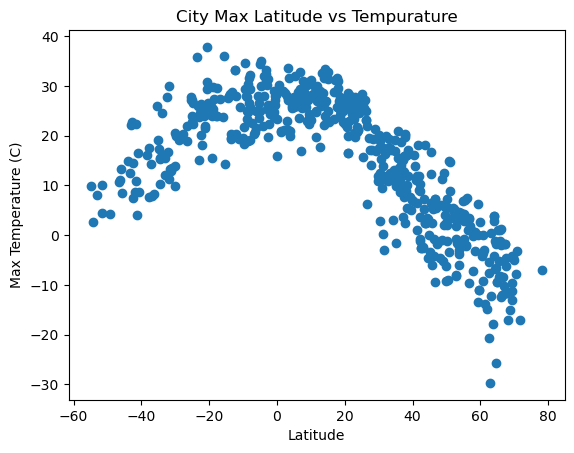

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Tempurature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

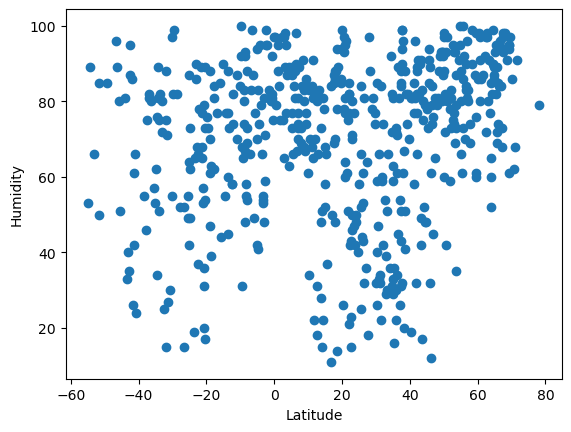

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

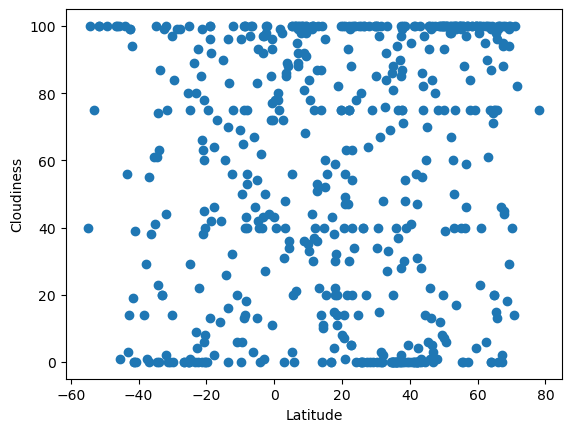

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter( city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

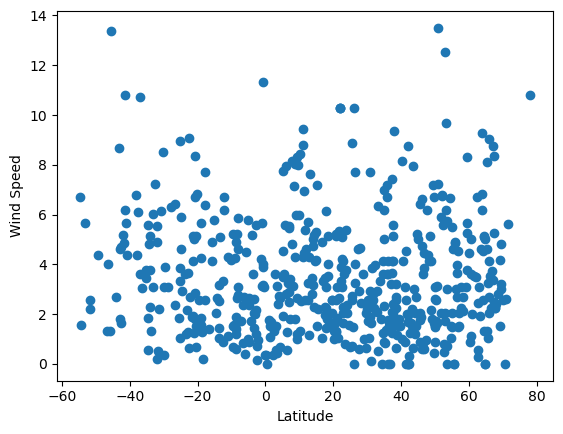

In [140]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [129]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is:{rvalue}.")
    print(f"The r-squared is:{rvalue**2}.")

In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,24.61,50,0,2.06,EG,1699850546
4,severo-yeniseyskiy,60.3725,93.0408,-4.12,98,98,0.89,RU,1699850546
6,ar rutbah,33.0381,40.2848,19.32,29,84,2.92,IQ,1699850547
8,lubao,14.9167,120.5500,32.84,58,96,5.30,PH,1699850547
10,anadyr,64.7500,177.4833,-1.72,86,75,5.00,RU,1699850547


In [131]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ambovombe,-25.1667,46.0833,27.27,42,0,3.35,MG,1699850546
2,andovoranto,-18.9500,49.1000,25.30,70,96,1.57,MG,1699850546
3,adamstown,-25.0660,-130.1015,22.78,87,100,8.95,PN,1699850546
5,margaret river,-33.9500,115.0667,24.65,51,63,2.28,AU,1699850546
7,port-aux-francais,-49.3500,70.2167,4.27,85,100,4.39,TF,1699850547


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8991087636848772.
The r-squared is:0.8083965689349484.


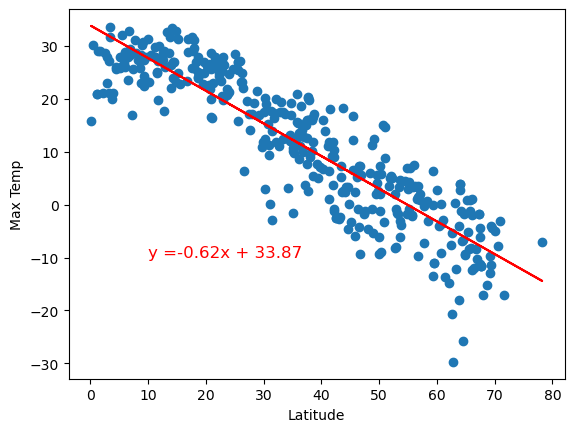

In [132]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -10))

The r-value is:0.7171820169167642.
The r-squared is:0.5143500453887978.


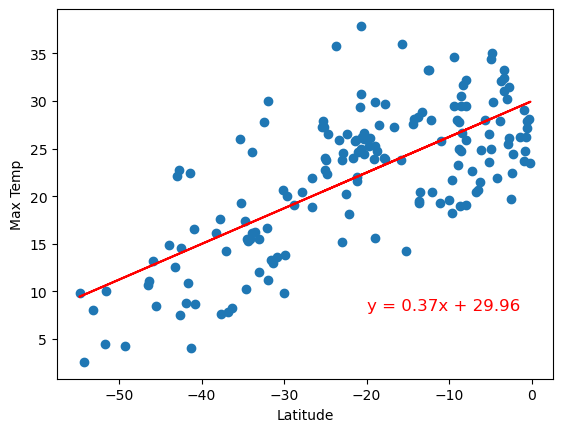

In [133]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-20, 8))

**Discussion about the linear relationship:** 

It seems that there might be a negative correlation in the northern hemisphere for the max temp and the latitude as the correlation coefficient is -.899 with a r-squared value of .808 which is a fairly high correlation.

However, in the southern hemisphere there is a positive correlation coefficient is only .717 and a r-squared of .514 which is significantly less, though still shows a slight correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.20920845895378395.
The r-squared is:0.04376817929781711.


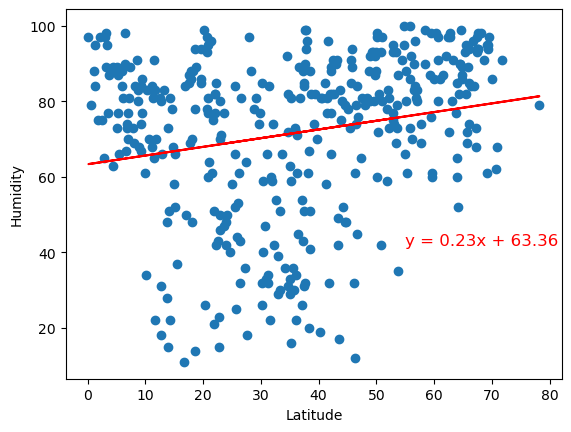

In [134]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (55, 42))

The r-value is:0.18483928669612568.
The r-squared is:0.03416556190633254.


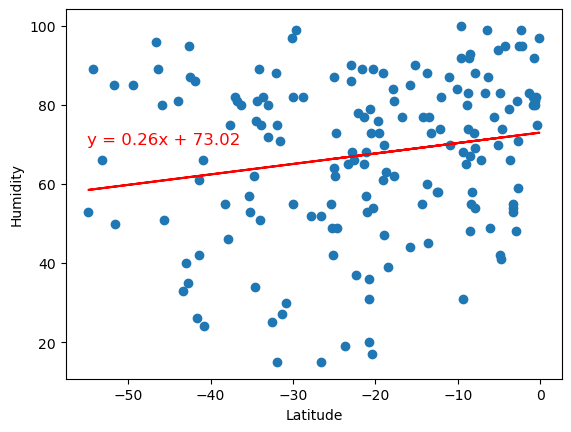

In [135]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-55, 70))

**Discussion about the linear relationship:** 

It seems to not be a correlation in the northern hemisphere for the humidity and the latitude as the correlation coefficient is .209 with a r-squared value of .043 which is a very low correlation.

The southern hemisphere there is a positive correlation coefficient of only .184 and a r-squared of .034 which is very low correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.0725256907520316.
The r-squared is:0.005259975819059321.


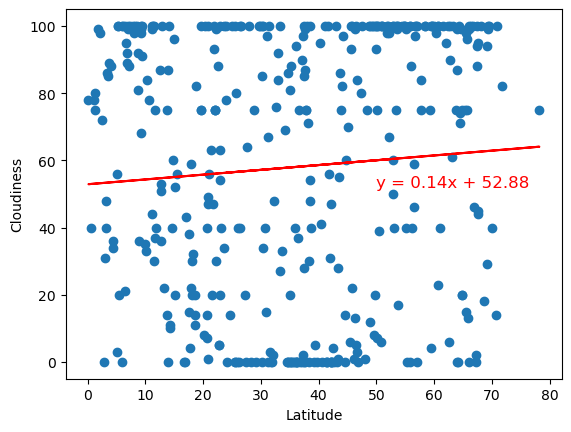

In [136]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 52))

The r-value is:0.054300547357194695.
The r-squared is:0.002948549443290944.


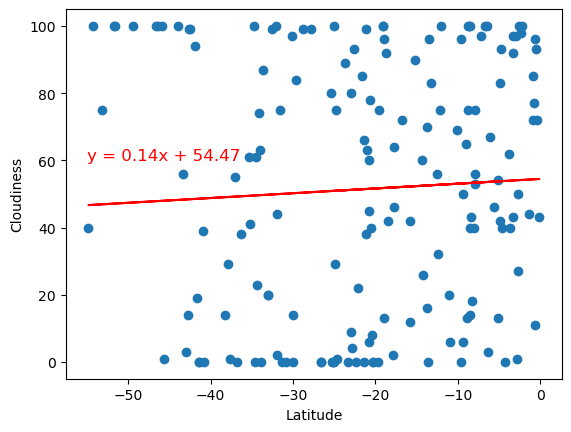

In [137]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-55, 60))

**Discussion about the linear relationship:** 

It seems to not be a correlation in the northern hemisphere for the cloudiness and the latitude as the correlation coefficient is .072 with a r-squared value of .005 which is a very low/no correlation.

The southern hemisphere there is a positive correlation coefficient of only .054 and a r-squared of .003 which is very low/no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.017478505867770323.
The r-squared is:0.0003054981673696816.


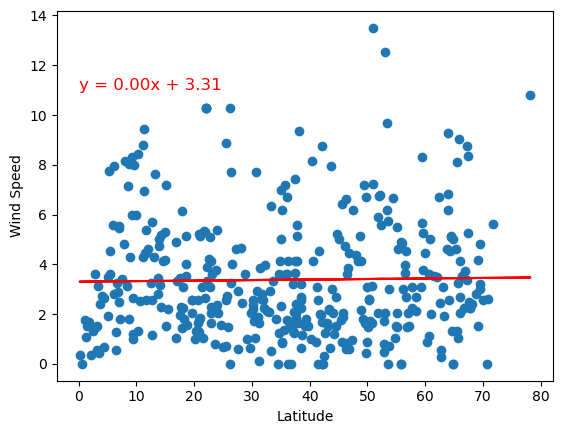

In [138]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (0, 11))

The r-value is:-0.24956572091072982.
The r-squared is:0.06228304905369229.


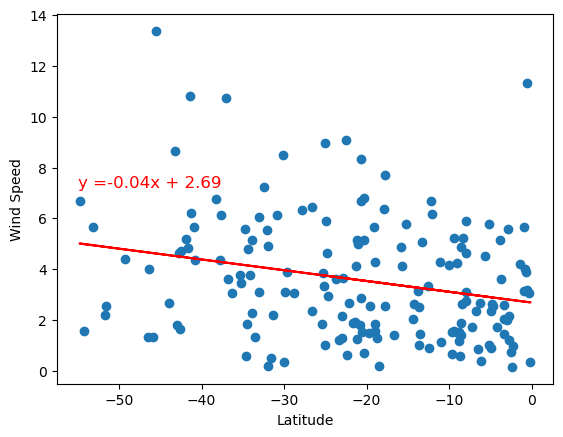

In [139]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-55, 7.2))

**Discussion about the linear relationship:** 

It seems to not be a correlation in the northern hemisphere for the wind speed and the latitude as the correlation coefficient is .017 with a r-squared value of .000 which is a very means no correlation.

The southern hemisphere there is a negative correlation coefficient of -.250 and a r-squared of .062 which is very low correlation.